In [4]:
import numpy as np
import scipy.io.wavfile
import scipy.signal
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
filename = 'ba_example'
sr, tutor = scipy.io.wavfile.read('../data/{}.wav'.format(filename))
sr, ba_learnt = scipy.io.wavfile.read('../data/ba_example_out.wav')

In [44]:
f, t, Sxx = scipy.signal.spectrogram(tutor, sr)

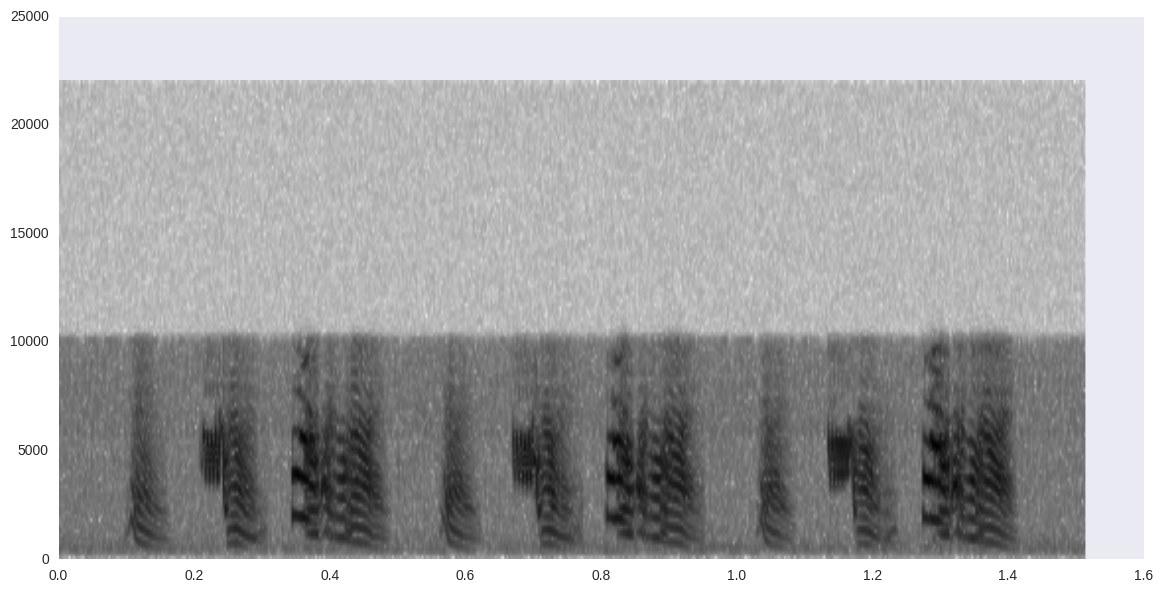

/home/ecoffet/.virtualenvs/birdsongs/lib/python3.4/site-packages/matplotlib/axes/_axes.py:7017: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


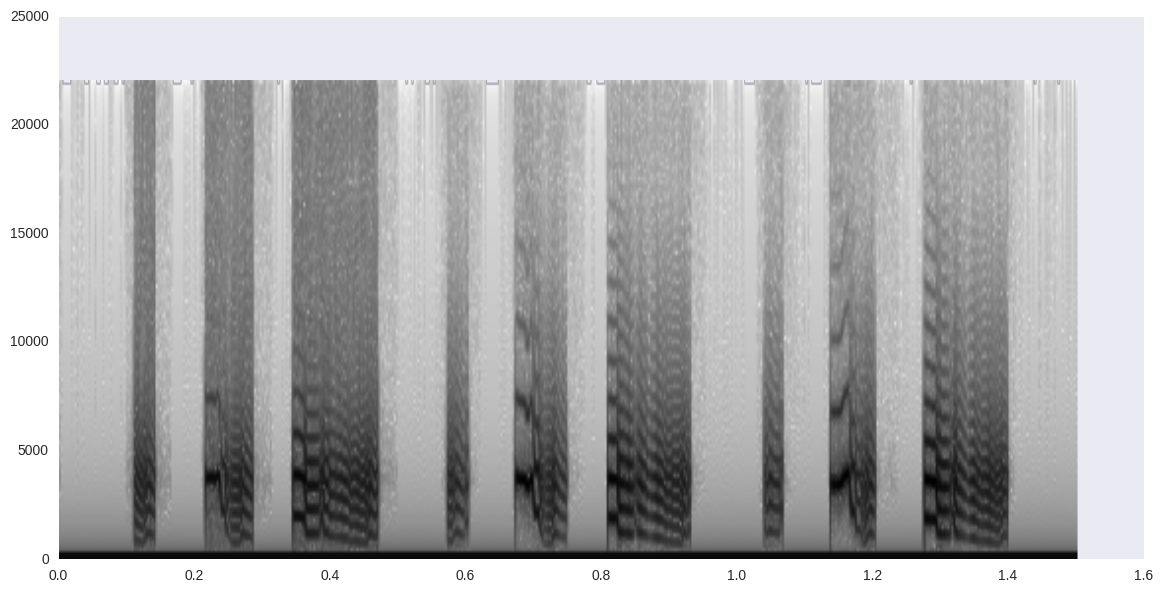

In [45]:
fig = plt.figure(figsize=(14, 7))
ax = fig.gca()
ax.specgram(tutor, Fs=sr)
ax.grid(False)
plt.show()
fig = plt.figure(figsize=(14, 7))
ax = fig.gca()
ax.specgram(ba_learnt, Fs=sr)
ax.grid(False)
plt.show()

In [46]:
from python_speech_features import mfcc

In [47]:
tutor_mfcc = mfcc(tutor, sr)[..., 1:]
ba_learnt_mfcc = mfcc(ba_learnt, sr)[..., 1:]
np.linalg.norm(tutor_mfcc[:149] - ba_learnt_mfcc)

746.41569061103758

# Focus on syllable B of Buenos Aires song

In [7]:
filename = 'ba_syllable_b'
sr, tutor = scipy.io.wavfile.read('../data/{}.wav'.format(filename))

In [9]:
sr, ba_learnt = scipy.io.wavfile.read('../data/ba_syllable_a_out.wav')

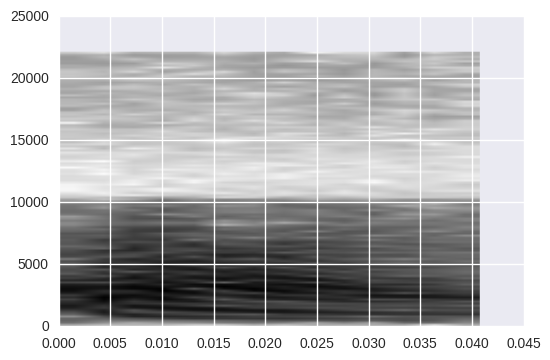

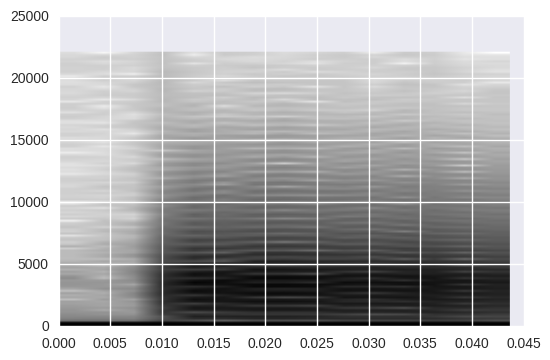

In [10]:
plt.specgram(tutor, Fs=sr)
plt.show()
plt.specgram(ba_learnt, Fs=sr)
plt.show()

In [11]:
tutor_mfcc = mfcc(tutor, sr)[..., 1:]
ba_learnt_mfcc = mfcc(ba_learnt, sr)[..., 1:]
np.linalg.norm(tutor_mfcc[0:2] - ba_learnt_mfcc[0:2])

100.85649318739267

# Have a look at $\alpha$ & $\beta$

In [5]:
dat = np.loadtxt('../model/test/comparison_files/ba_example_ab.dat')

Let us remove flat zone and high spikes

In [8]:
alpha = dat[:, 0]
alpha[np.where(np.abs(alpha) < 0.05)] = np.nan
beta = dat[:, 1]
beta[np.where(np.abs(beta - 0.15) < 0.1)] = np.nan

/home/ecoffet/.virtualenvs/birdsongs/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in absolute
  from ipykernel import kernelapp as app
/home/ecoffet/.virtualenvs/birdsongs/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app


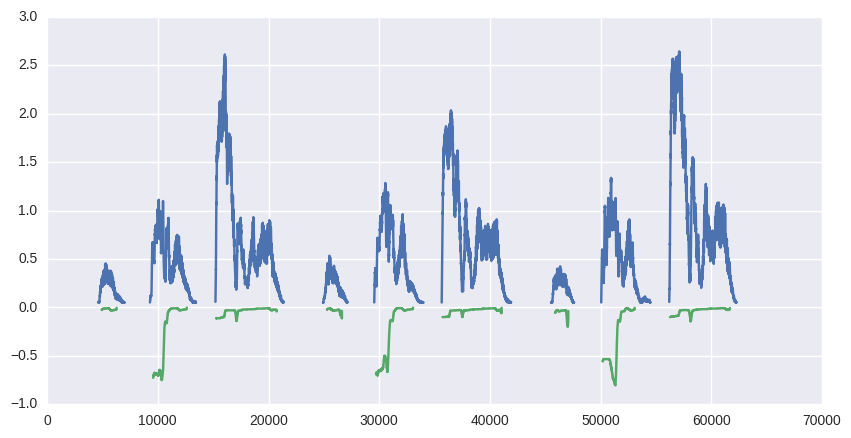

In [9]:
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()
ax.plot(alpha)
ax.plot(beta)
plt.show(fig)

0.488311


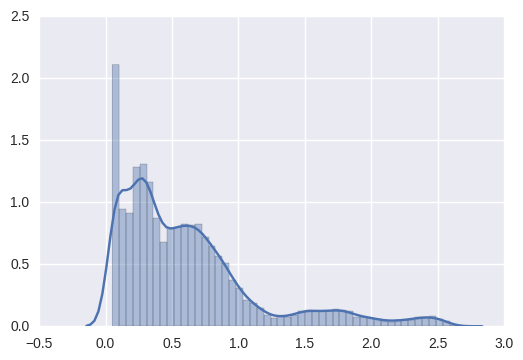

In [51]:
sns.distplot(alpha[~np.isnan(alpha)])
print(np.median(alpha[~np.isnan(alpha)]))

-0.028


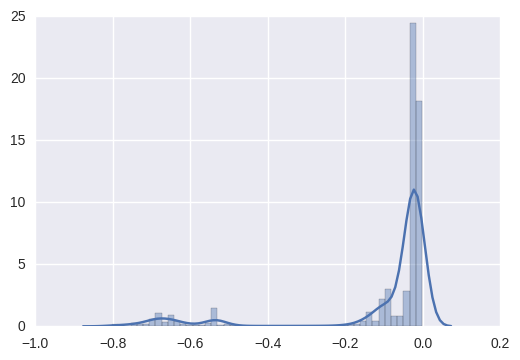

In [52]:
sns.distplot(beta[~np.isnan(beta)])
print(np.median(beta[~np.isnan(beta)]))

4700 6810


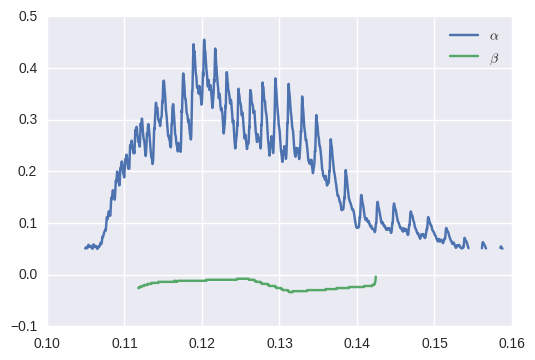

9289 13199


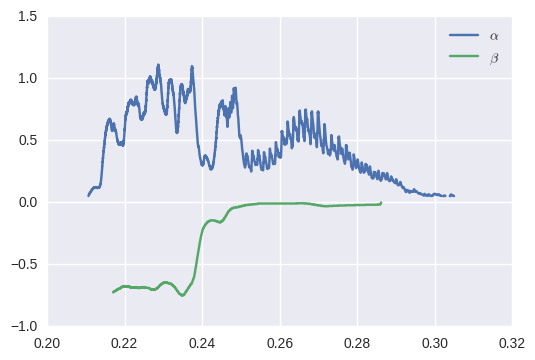

15207 21277


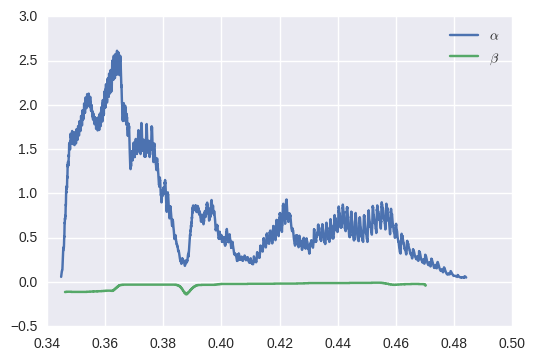

24965 27055


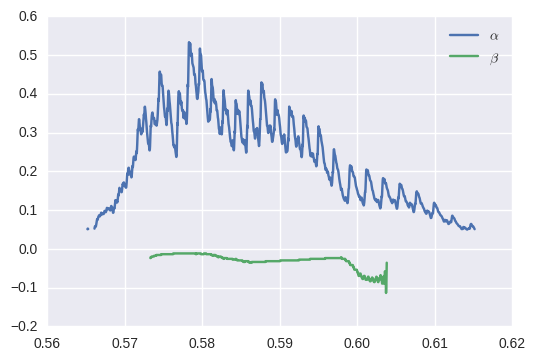

29549 33689


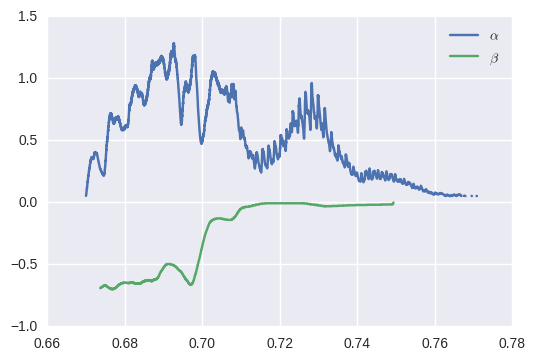

35642 41702


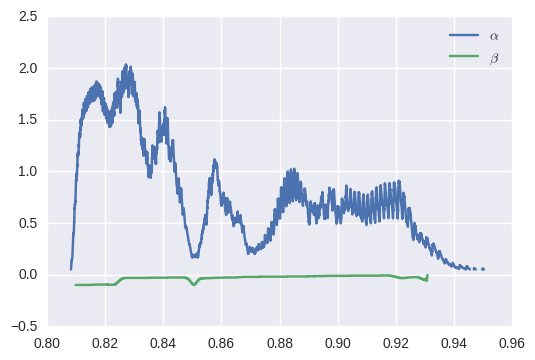

45603 47533


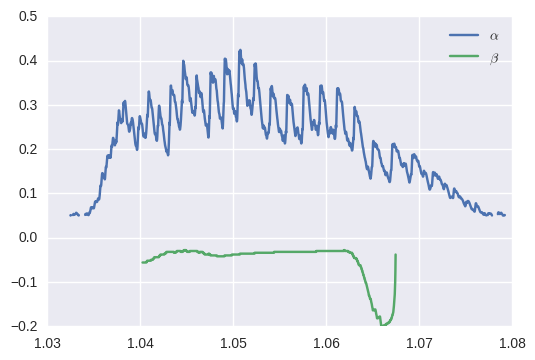

50050 53600


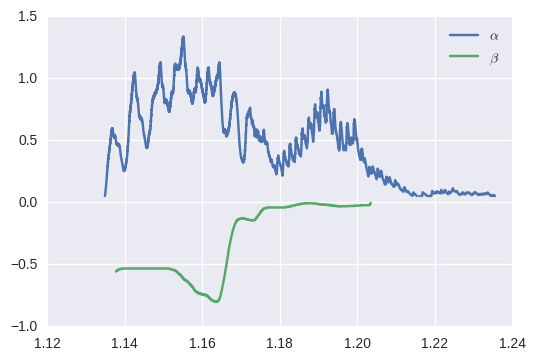

56192 62192


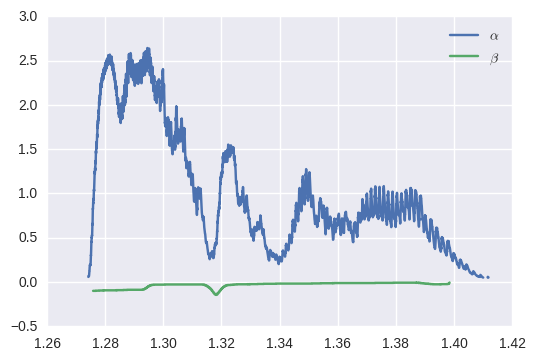

In [26]:
i = 0
while i < len(alpha):
    if not np.isnan(alpha[i]):
        j = i
        while j < dat.shape[0] and not np.isnan(alpha[j]):
            j += 10
        if j - i > 1000:
            print(i, j)
            plt.figure(i)
            plt.plot(np.arange(i-1000, j+1000)/sr, alpha[(i-1000):(j+1000)], label=r"$\alpha$")
            plt.plot(np.arange(i-1000, j+1000)/sr, beta[(i-1000):(j+1000)], label=r"$\beta$")
            plt.legend()
            plt.show(i)
        i = j + 1
    else:
        i += 1

4700 6810


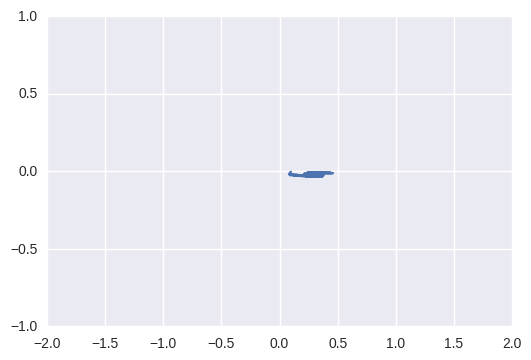

9289 13199


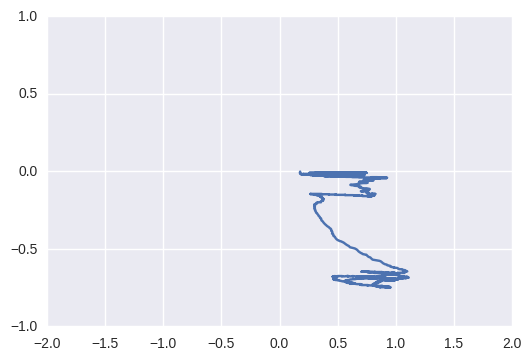

15207 21277


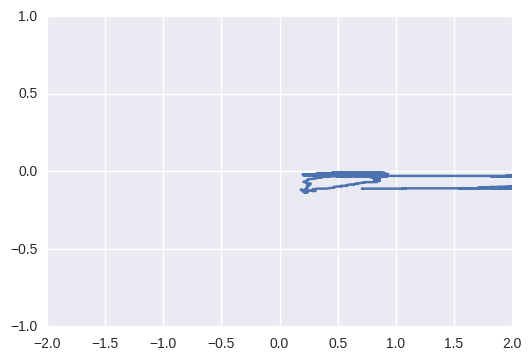

24965 27055


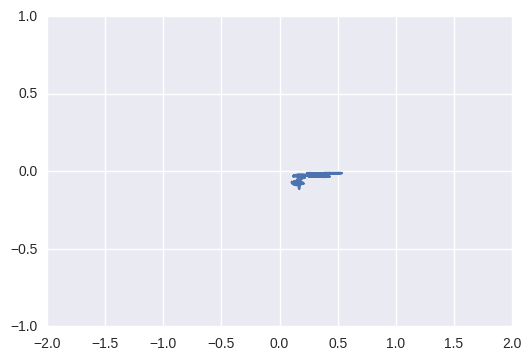

29549 33689


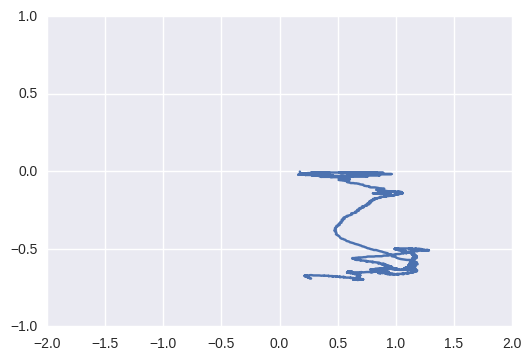

35642 41702


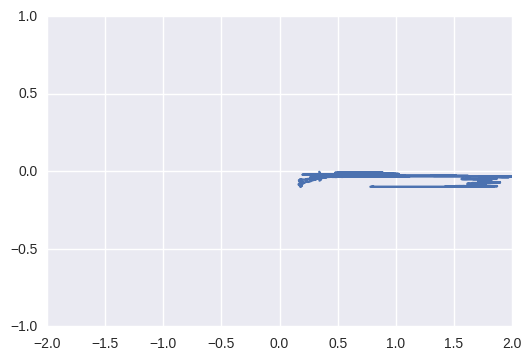

45603 47533


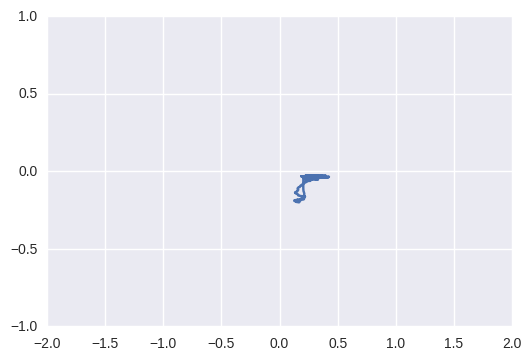

50050 53600


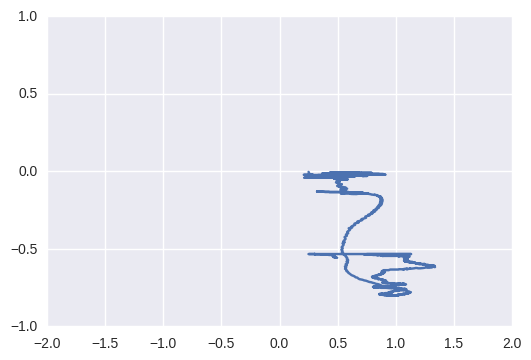

56192 62192


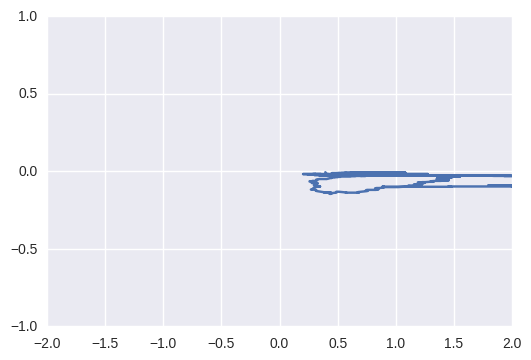

In [60]:
i = 0
while i < len(alpha):
    if not np.isnan(alpha[i]):
        j = i
        while j < dat.shape[0] and not np.isnan(alpha[j]):
            j += 10
        if j - i > 1000:
            print(i, j)
            plt.figure(i)
            plt.plot(alpha[(i-1000):(j+1000)], beta[(i-1000):(j+1000)])
            plt.ylim((-1, 1))
            plt.xlim((-2, 2))
            plt.show(i)
        i = j + 1
    else:
        i += 1

(-2, 2)

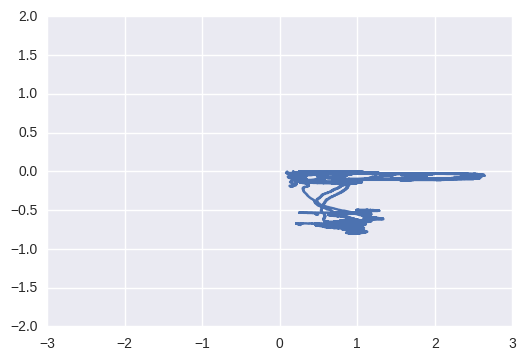

In [62]:
plt.plot(alpha, beta)
plt.xlim((-3, 3))
plt.ylim((-2, 2))

# Let's see with other birdsongs

In [63]:
sr, tutor = scipy.io.wavfile.read('../data/bells.wav')

dat = np.loadtxt('../data/bells_ab.dat')
pos = np.where(np.abs(np.diff(dat)) >= 1)[0]
#dat[pos] = np.nan

/home/ecoffet/.virtualenvs/birdsongs/lib/python3.4/site-packages/matplotlib/axes/_axes.py:7017: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


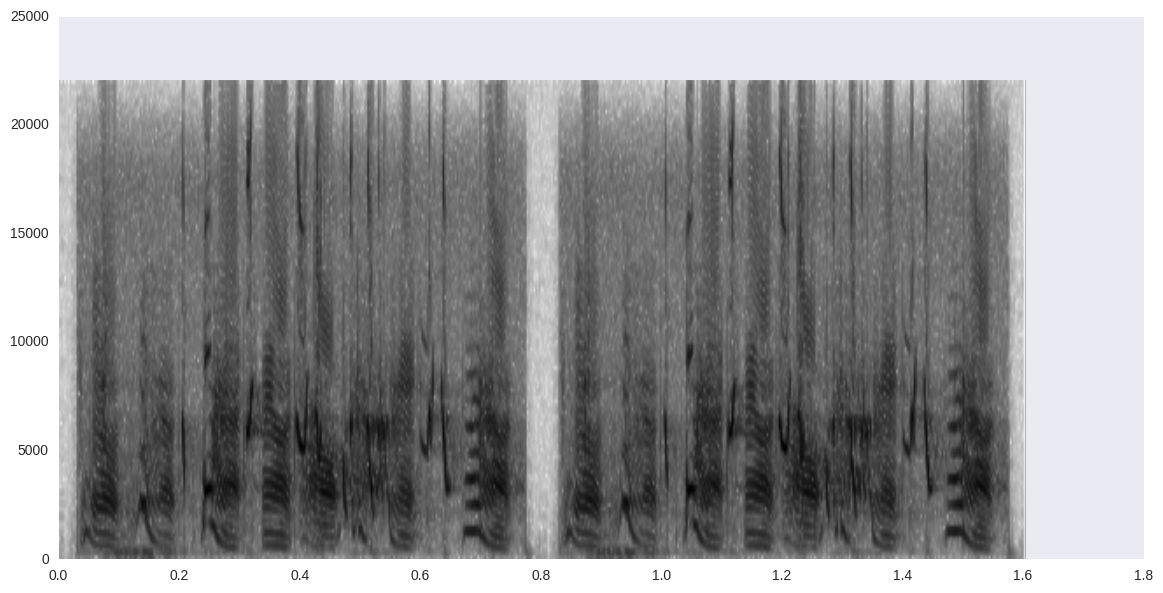

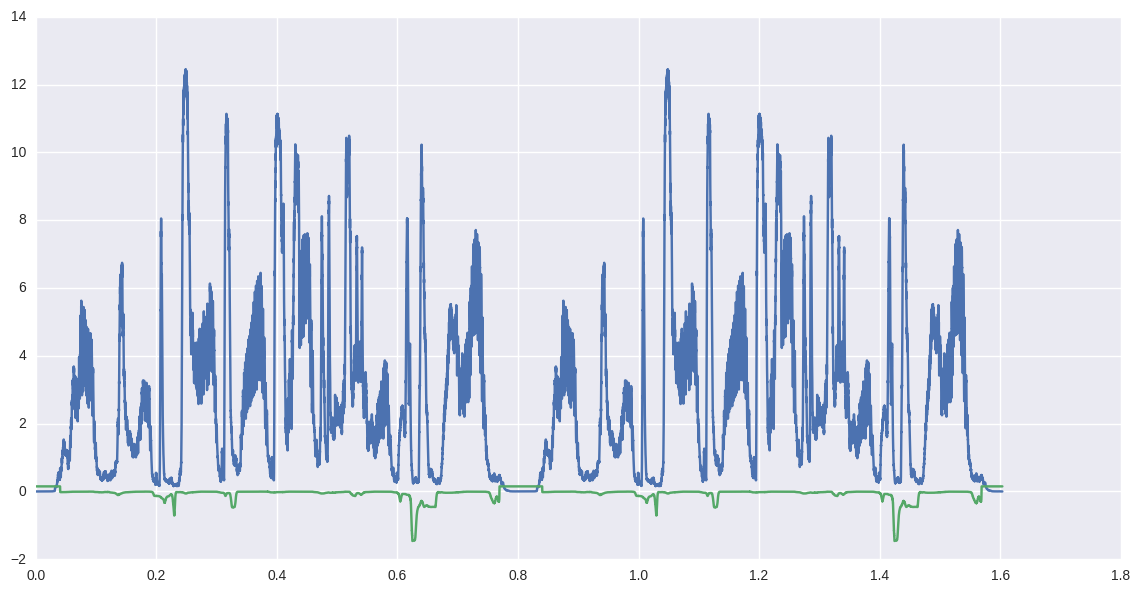

In [64]:
fig = plt.figure(figsize=(14, 7))
ax = fig.gca()
ax.specgram(tutor, Fs=sr)
ax.grid(False)
plt.show()
fig = plt.figure(figsize=(14, 7))
ax = fig.gca()
ax.plot(np.arange(dat.shape[0])/sr, dat)

plt.show()

How it should be according to BA

![fit in a nice way](pretty_fit_ab_spec.png)

Let us remove flat zone and high spikes

In [65]:
alpha = dat[:, 0]
alpha[np.where(np.abs(alpha) < 0.1)] = np.nan
beta = dat[:, 1]
beta[np.where(np.abs(beta - 0.15) < 0.1)] = np.nan

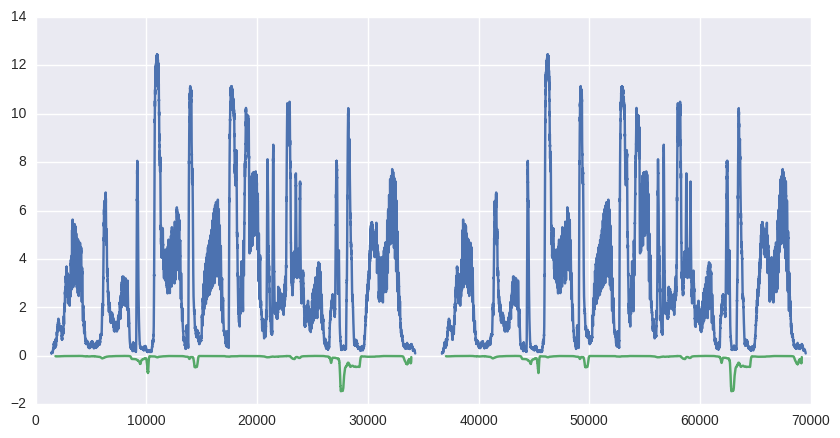

In [66]:
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()
ax.plot(alpha)
ax.plot(beta)
plt.show(fig)

1415 34285


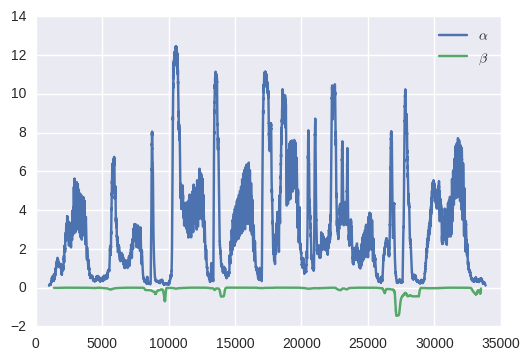

36686 69556


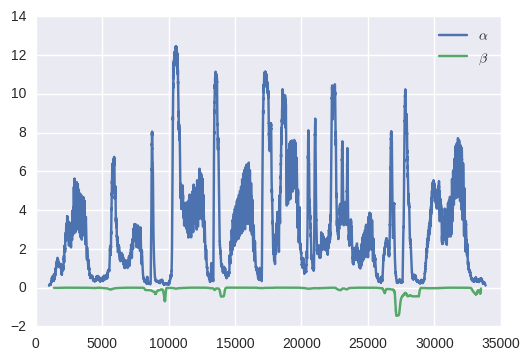

In [32]:
i = 0
while i < len(alpha):
    if not np.isnan(alpha[i]):
        j = i
        while j < dat.shape[0] and not np.isnan(alpha[j]):
            j += 10
        if j - i > 1000:
            print(i, j)
            plt.figure(i)
            plt.plot(alpha[(i-1000):(j+1000)], label=r"$\alpha$")
            plt.plot(beta[(i-1000):(j+1000)], label=r"$\beta$")
            plt.legend()
            plt.show(i)
        i = j + 1
    else:
        i += 1

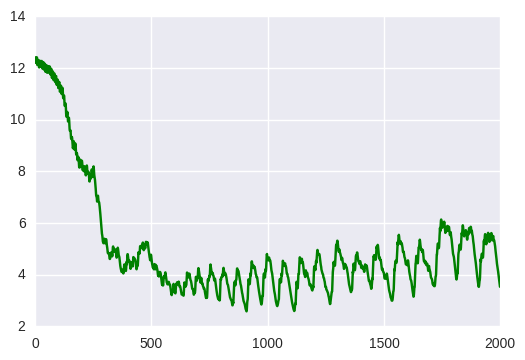

In [41]:
plt.plot(alpha[11000:13000], c='green')

(-12, 12)

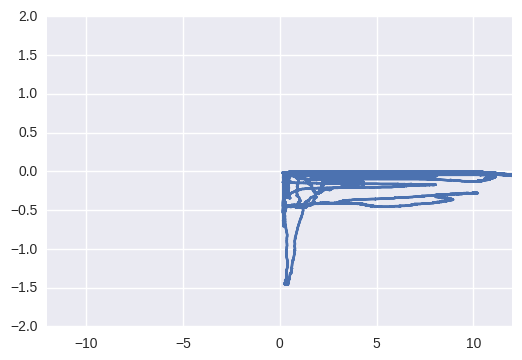

In [69]:
plt.plot(alpha, beta)
plt.ylim((-2, 2))
plt.xlim((-12, 12))

## With flashcam

In [10]:
dat = np.loadtxt('../data/flashcam_ab.dat')


In [11]:
alpha = dat[:, 0]
alpha[np.where(np.abs(alpha) < 0.1)] = np.nan
beta = dat[:, 1]
beta[np.where(np.abs(beta - 0.15) < 0.1)] = np.nan

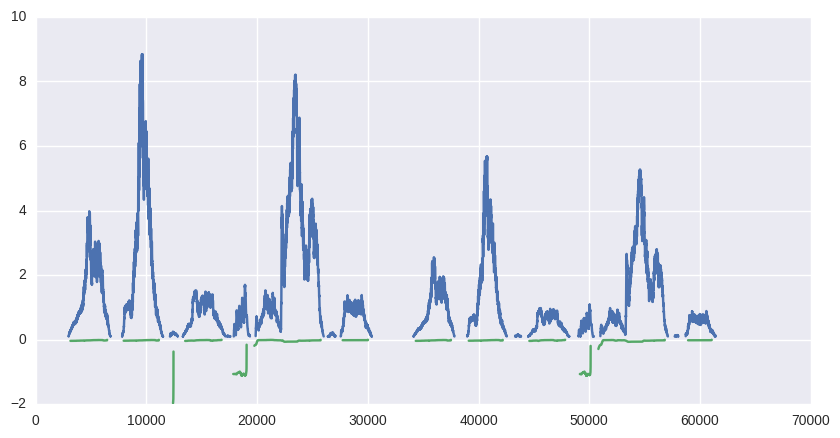

In [12]:
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()
ax.plot(alpha)
ax.plot(beta)
plt.show(fig)

2969 6769


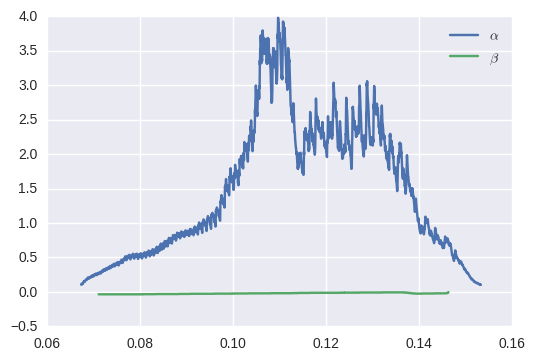

7804 11494


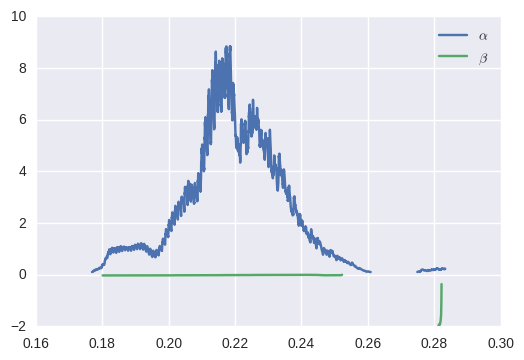

13296 17136


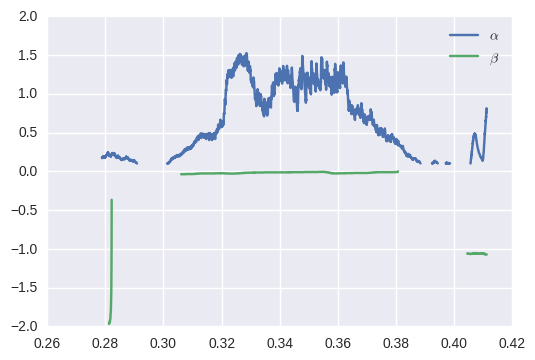

17889 19349


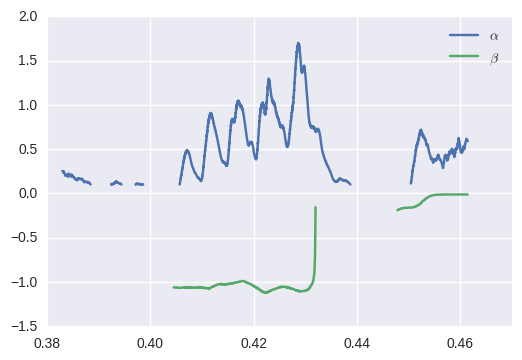

19863 26013


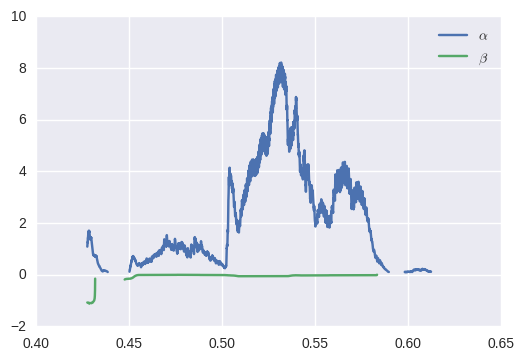

27542 30352


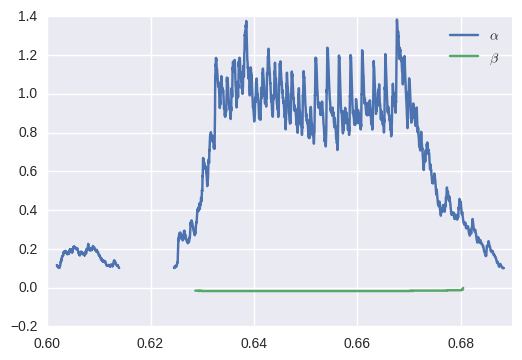

34137 37827


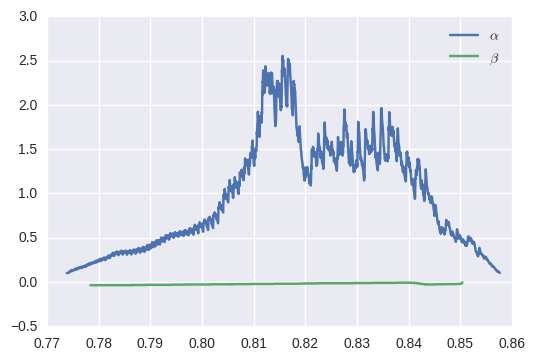

38969 42549


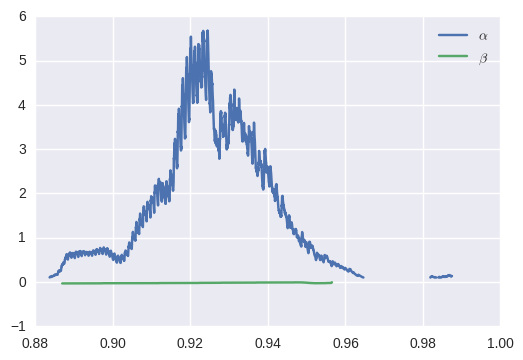

44481 48141


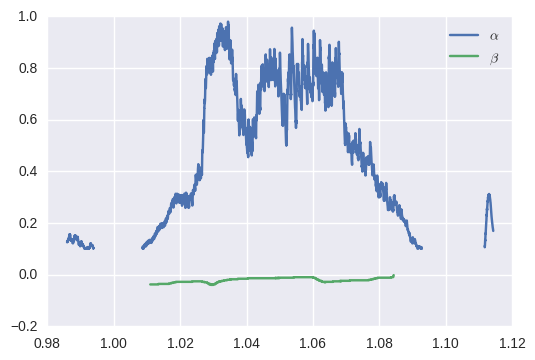

49208 50338


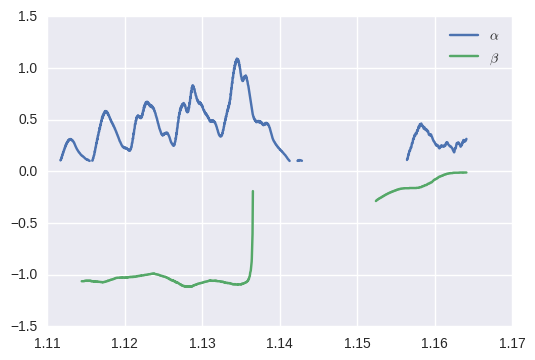

50999 57099


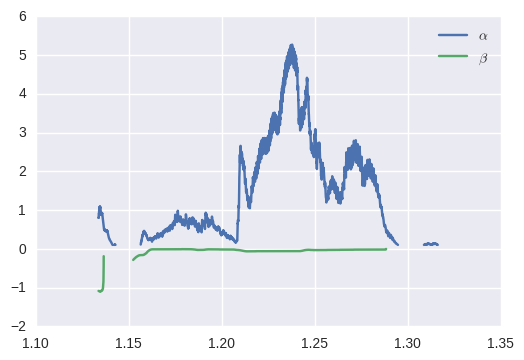

58706 61426


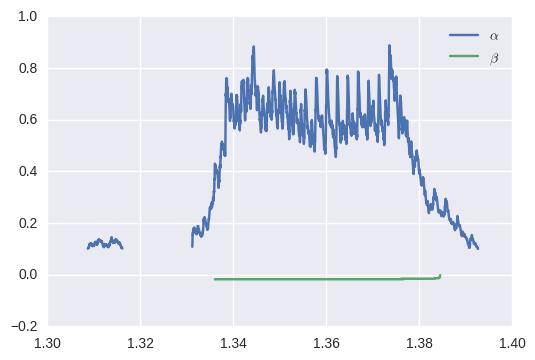

In [15]:
i = 0
sr = 44100
while i < len(alpha):
    if not np.isnan(alpha[i]):
        j = i
        while j < dat.shape[0] and not np.isnan(alpha[j]):
            j += 10
        if j - i > 1000:
            print(i, j)
            plt.figure(i)
            plt.plot(np.arange(i-1000, j+1000)/sr, alpha[(i-1000):(j+1000)], label=r"$\alpha$")
            plt.plot(np.arange(i-1000, j+1000)/sr, beta[(i-1000):(j+1000)], label=r"$\beta$")
            plt.legend()
            plt.show(i)
        i = j + 1
    else:
        i += 1